In [3]:
import numpy as np
import pylab as plt
import pandas as pd
import os
%matplotlib inline
import pickle
from Image import *

In [10]:
Root="/Users/ben.jones/Documents/Data/02_06_On_LongExp/"
dat=pd.read_excel("/Users/ben.jones/Documents/Data/02_06_On_LongExp/RunList.xlsx")

87
225
296
411
567
792
954
32
88
205
304
409
539
625
736
828
952
49
126
362
488
567
779
916
22
120
172
260
513
586
710
855
951


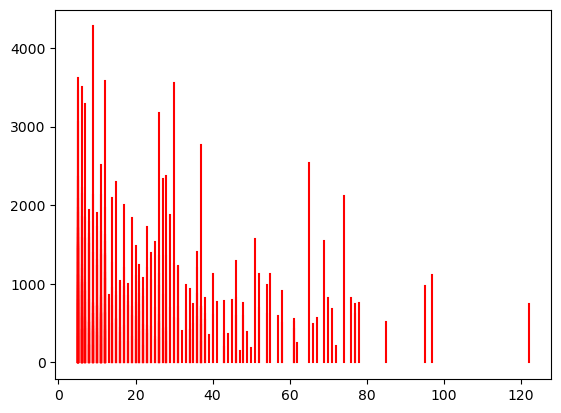

In [96]:
ConfCut=3
SpotsDict={'Heights':[],
          'Times':[],
          'Confs':[],
          'Traces':[],
          'X':[],
          'Y':[],
          'Im':[],
          'Folder':[],
          'IntegralBefore':[],
          'IntegralAfter':[],
          'Integral':[]}
for i in range(len(dat)):
    
    print(dat.iloc[i].Start)
    filenames=[]
    for j in range(dat.iloc[i].Start,dat.iloc[i].End):
        filenames.append(Root+"/"+str(dat.iloc[i].Folder)+"/Image"+str(dat.iloc[i].ImIndex)+"_"+str(j).zfill(5)+".tif")
    settings=SequenceSettings()
    settings.imtype='tif'
    settings.TopN=100
    Seq=Sequence(filenames,settings)    
    for spot in range(0,10):
        TimeSeq=Seq.GetTimeSeq(spot)
        Locs,StepHeight,StepConfidence=Seq.StepMetric(TimeSeq)

        if(sum(np.array(StepConfidence)>ConfCut)>0):
            s=np.argmax(StepConfidence)
            plt.plot([Locs[s],Locs[s]],[0,np.max(TimeSeq)*1.1],color='red')
            SpotsDict['Times'].append(Locs[s])
            SpotsDict['Heights'].append(StepHeight[s])
            SpotsDict['Confs'].append(StepConfidence[s])
            SpotsDict['Traces'].append(TimeSeq)
            SpotsDict['X'].append(Seq.Found[spot,0])
            SpotsDict['Y'].append(Seq.Found[spot,1])
            SpotsDict['Im'].append(i)
            SpotsDict['Folder'].append(dat.iloc[i].Folder)
            SpotsDict['IntegralBefore'].append(sum(TimeSeq[0:s]))
            SpotsDict['IntegralAfter'].append(sum(TimeSeq[s:]))  
            SpotsDict['Integral'].append(sum(TimeSeq))
f=open(Root+"/spots.dat",'wb')
pickle.dump(SpotsDict,f)
f.close()


In [97]:
ConfCut=3

Root="/Users/ben.jones/Documents/Data/02_06_On_LongExp/"

for path in os.listdir(Root):
    if('Vac' in path):
        Base=Root+"/"+path
        
        print("Chewing on "+Base)

        try:
            os.mkdir(Base+"/gifs/")
            os.mkdir(Base+"/spots/")

        except:
            print("dir already exists")

        for j in range(1,8):
            filenames=[]
            allfiles=sorted(os.listdir(Base+"/"+str(j)))

            for i in range(0,99):
                filenames.append(Base+"/"+str(j)+"/im_"+str(i).zfill(3)+".txt")
            #for f in allfiles:
            #    if('227_' in f):
            #        filenames.append(Base+"/"+f)

            settings=SequenceSettings()
            settings.imtype='txt'
            Seq=Sequence(filenames,settings)    
            Seq.MakeGif(Base+"/gifs/"+str(j)+".gif",vmin=5000, vmax=25000, cmap='afmhot')


            for spot in range(0,40):
                TimeSeq=Seq.GetTimeSeq(spot)
                Locs,StepHeight,StepConfidence=Seq.StepMetric(TimeSeq)

                if(sum(np.array(StepConfidence)>ConfCut)>0):
                    s=np.argmax(StepConfidence)
                    plt.plot([Locs[s],Locs[s]],[0,np.max(TimeSeq)*1.1],color='red')
                    SpotsDict['Times'].append(Locs[s])
                    SpotsDict['Heights'].append(StepHeight[s])
                    SpotsDict['Confs'].append(StepConfidence[s])
                    SpotsDict['Traces'].append(TimeSeq)
                    SpotsDict['X'].append(Seq.Found[spot,0])
                    SpotsDict['Y'].append(Seq.Found[spot,1])
                    SpotsDict['Im'].append(j)
                    SpotsDict['IntegralBefore'].append(sum(TimeSeq[0:s]))
                    SpotsDict['IntegralAfter'].append(sum(TimeSeq[s:]))  
                    SpotsDict['Integral'].append(sum(TimeSeq))
        f=open(Base+"/spots/spots.dat",'wb')
        pickle.dump(SpotsDict,f)
        f.close()

(108.99733340038023, 408.9973334003802)

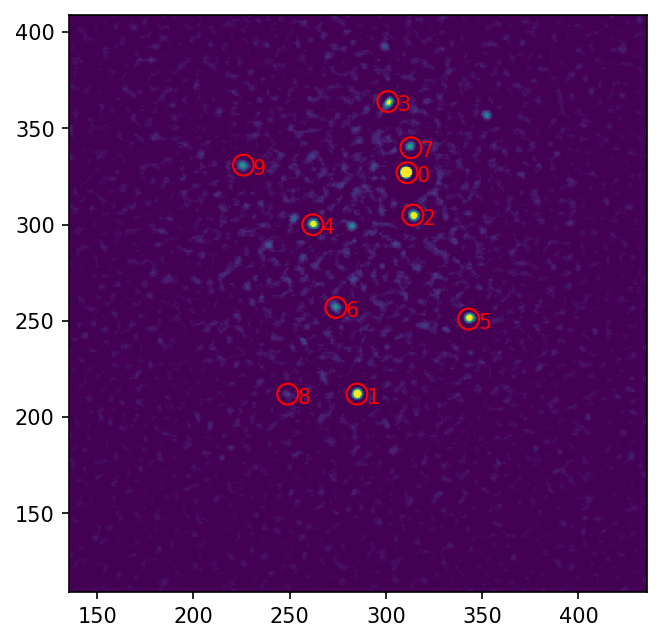

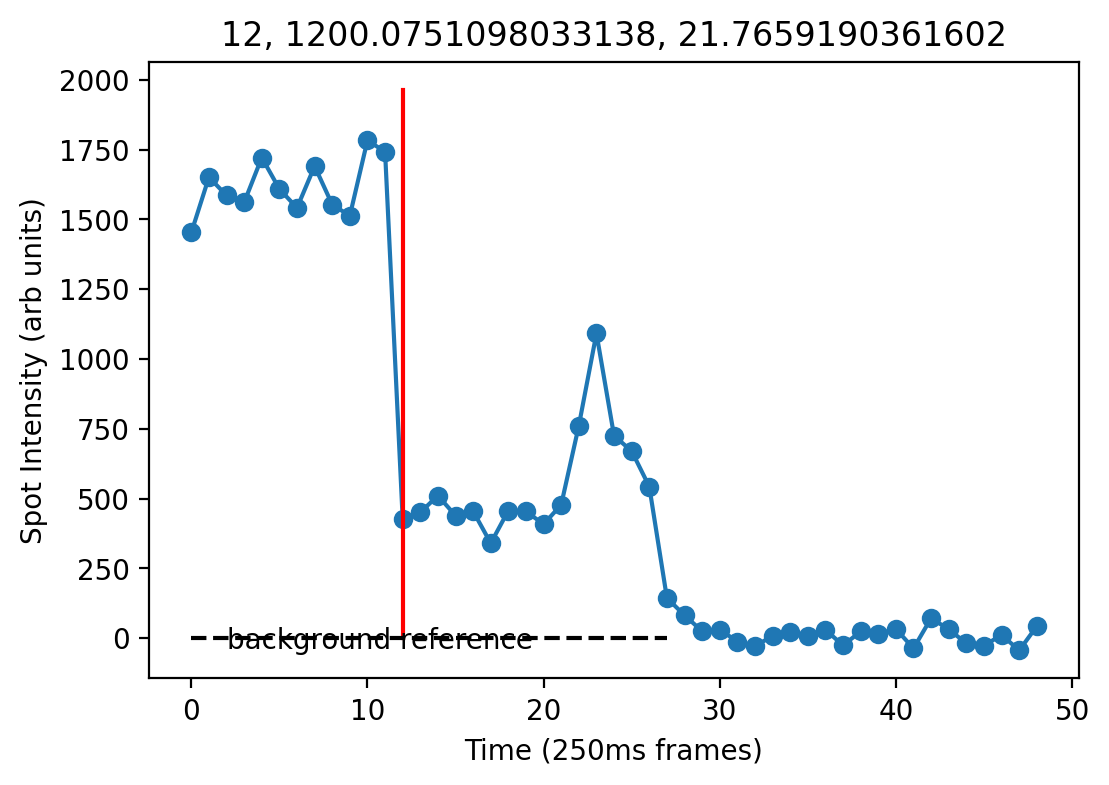

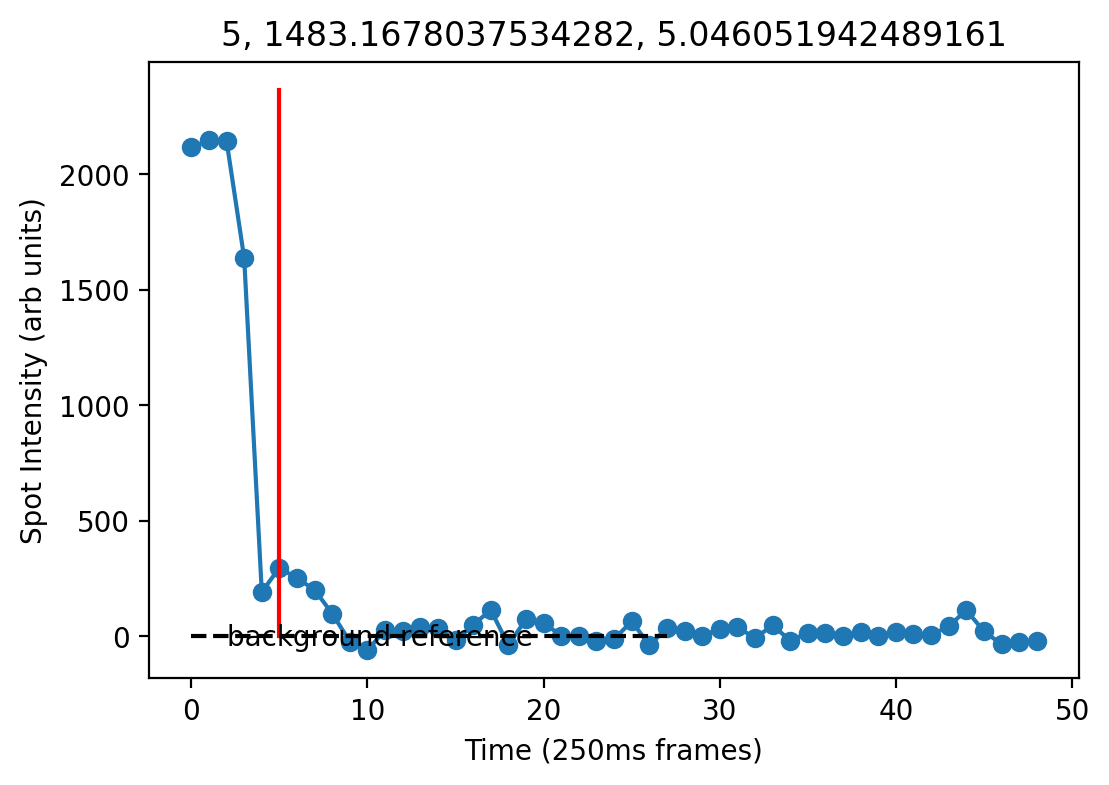

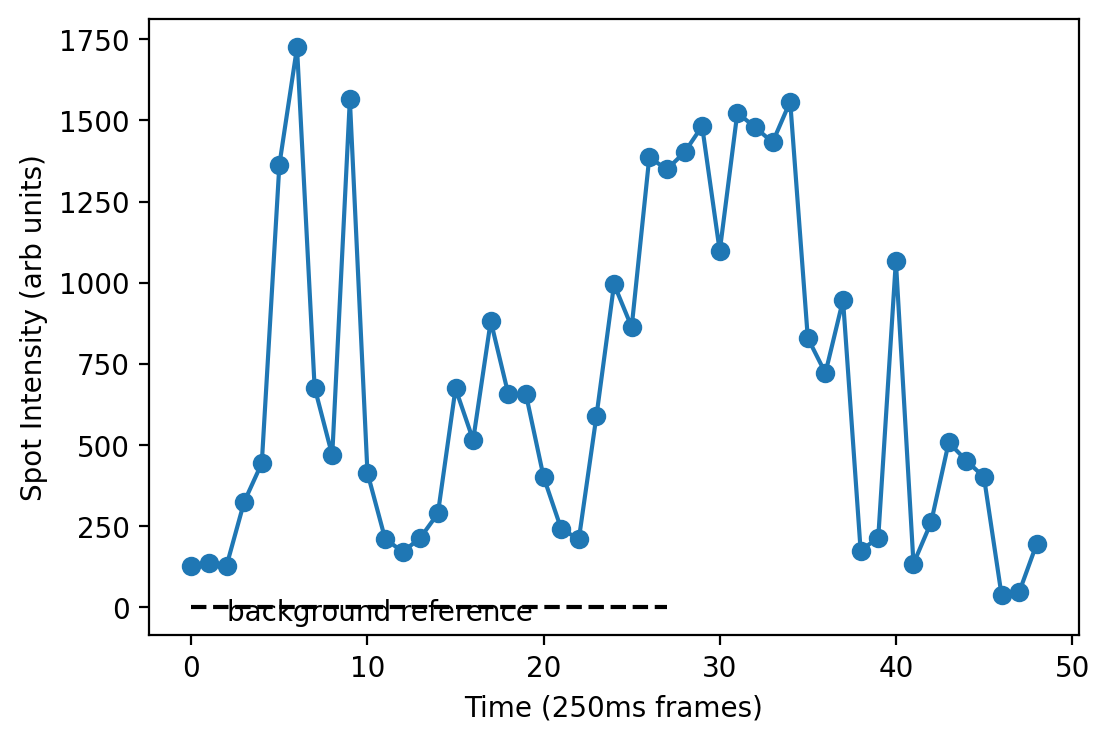

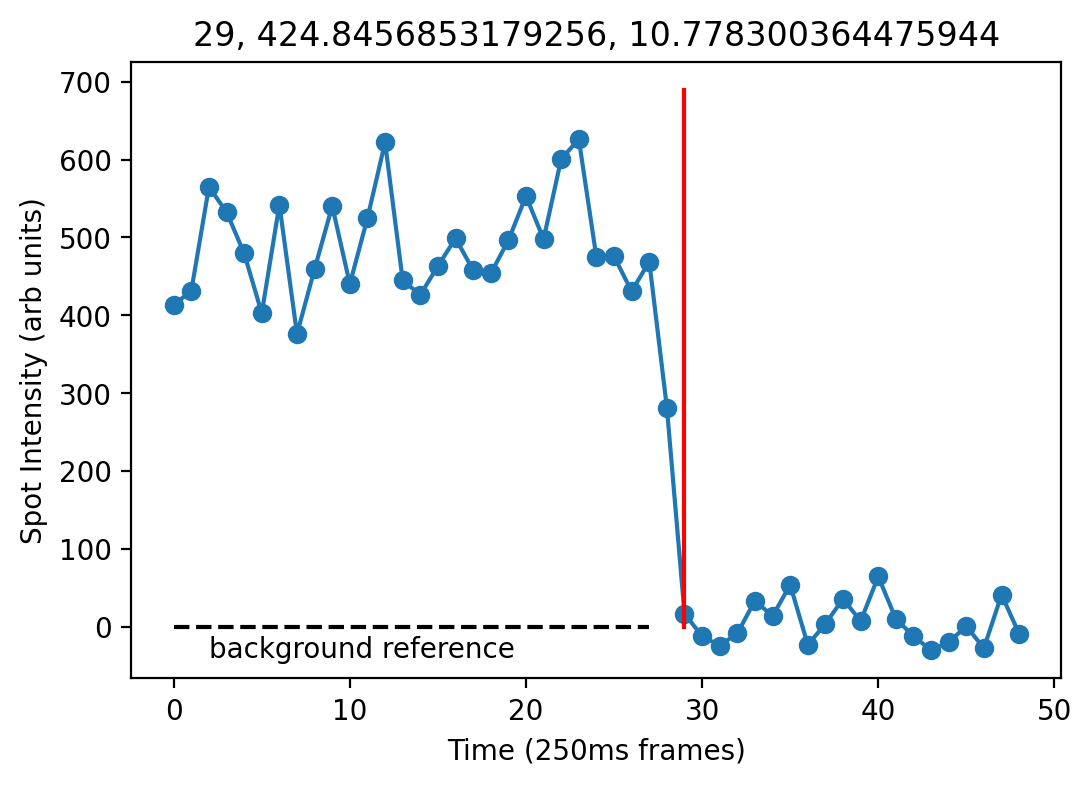

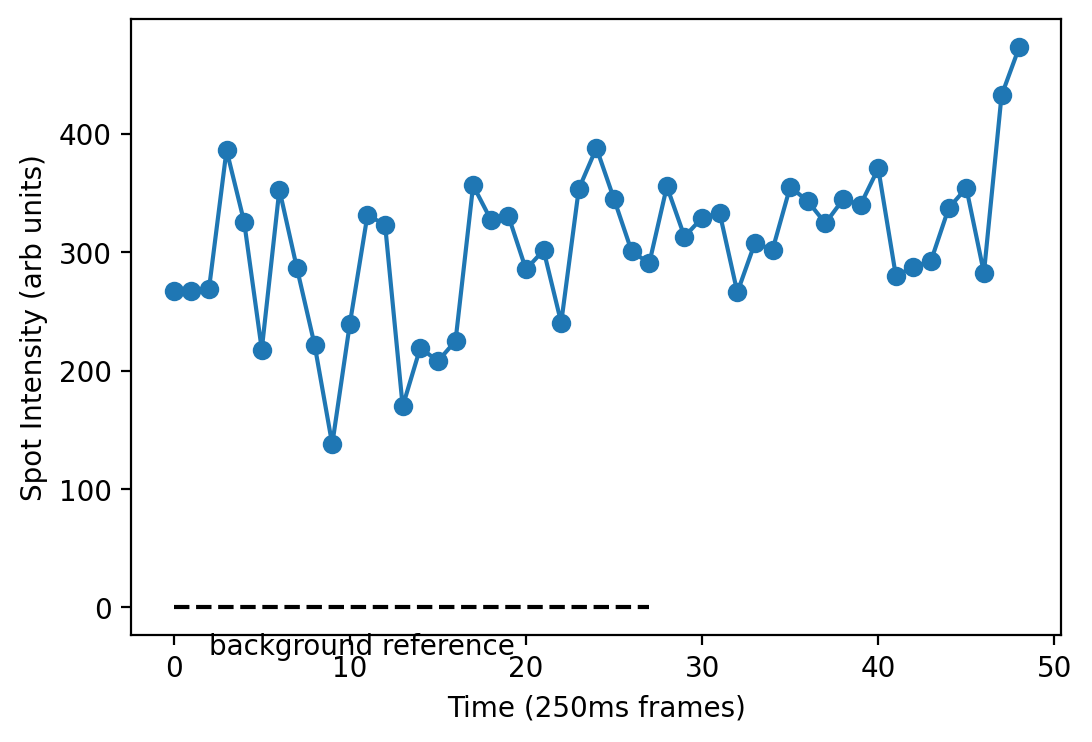

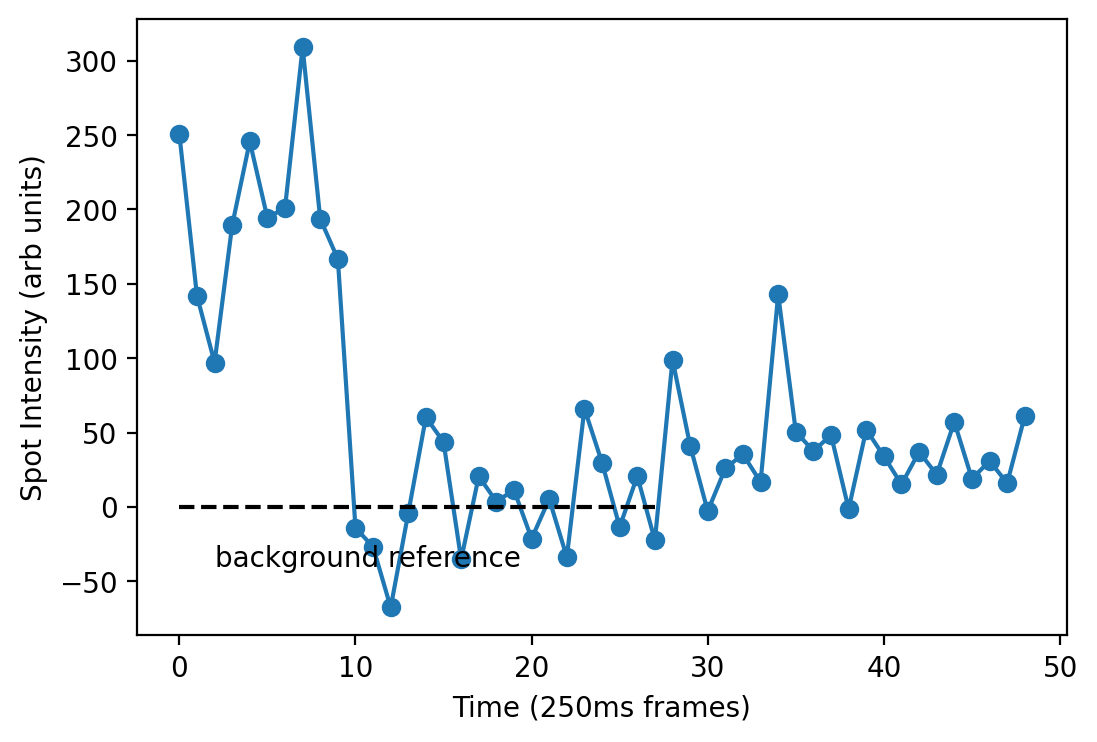

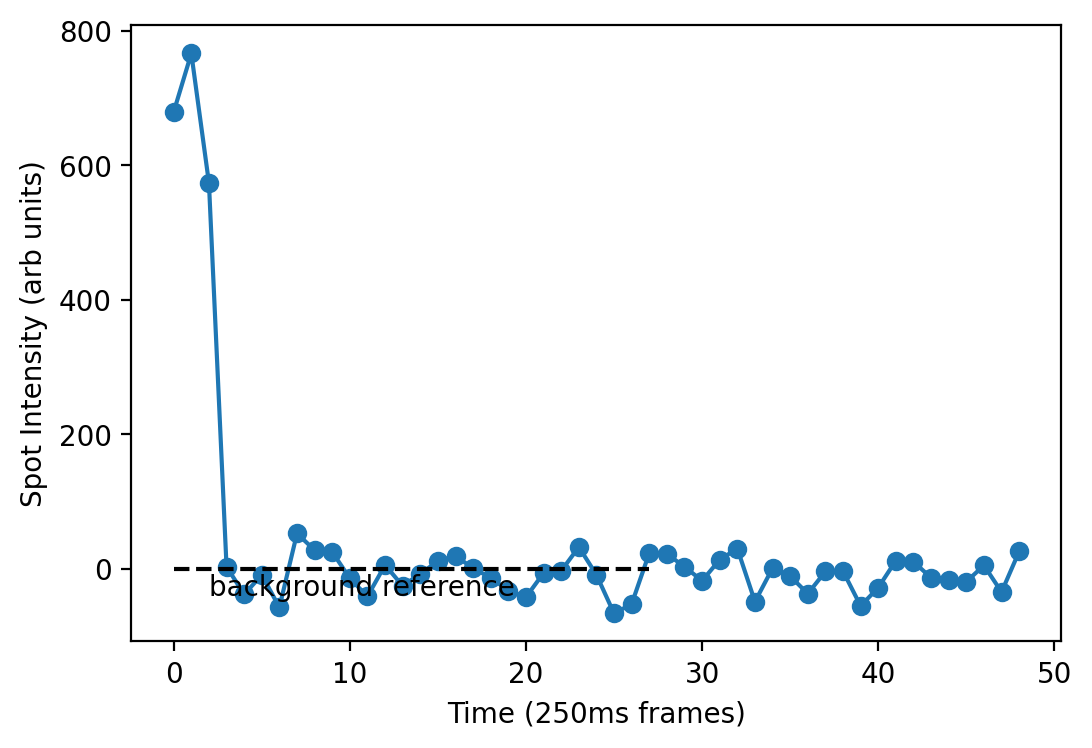

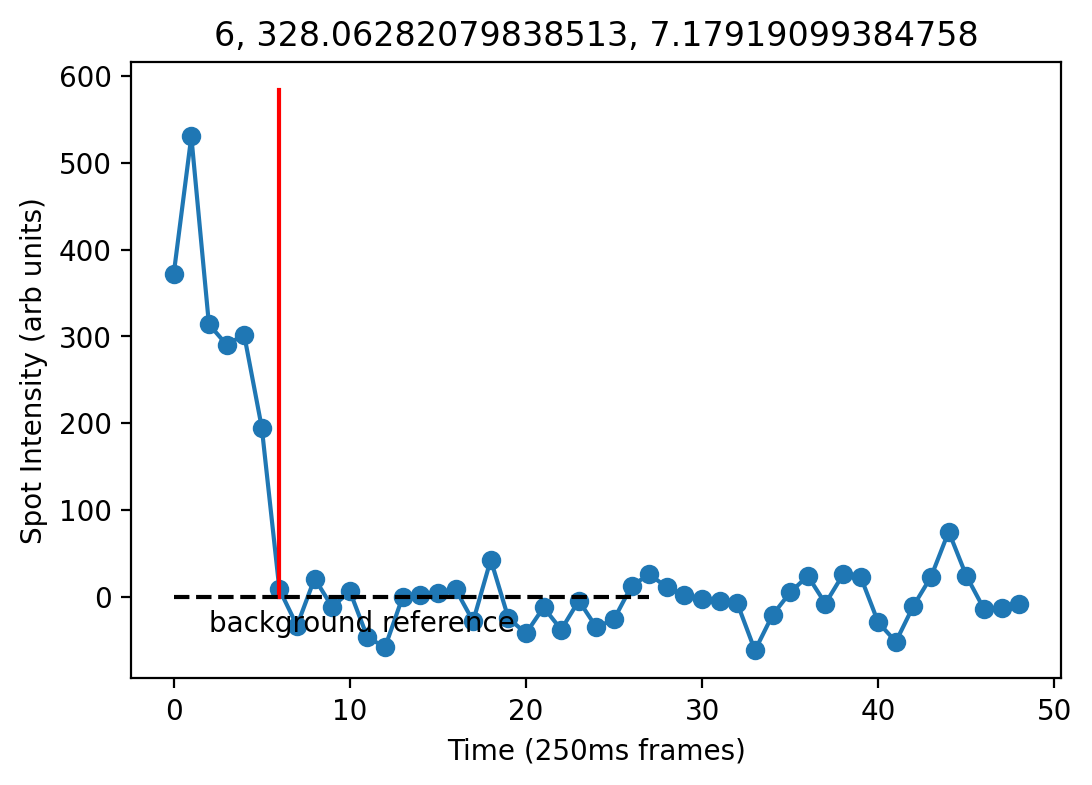

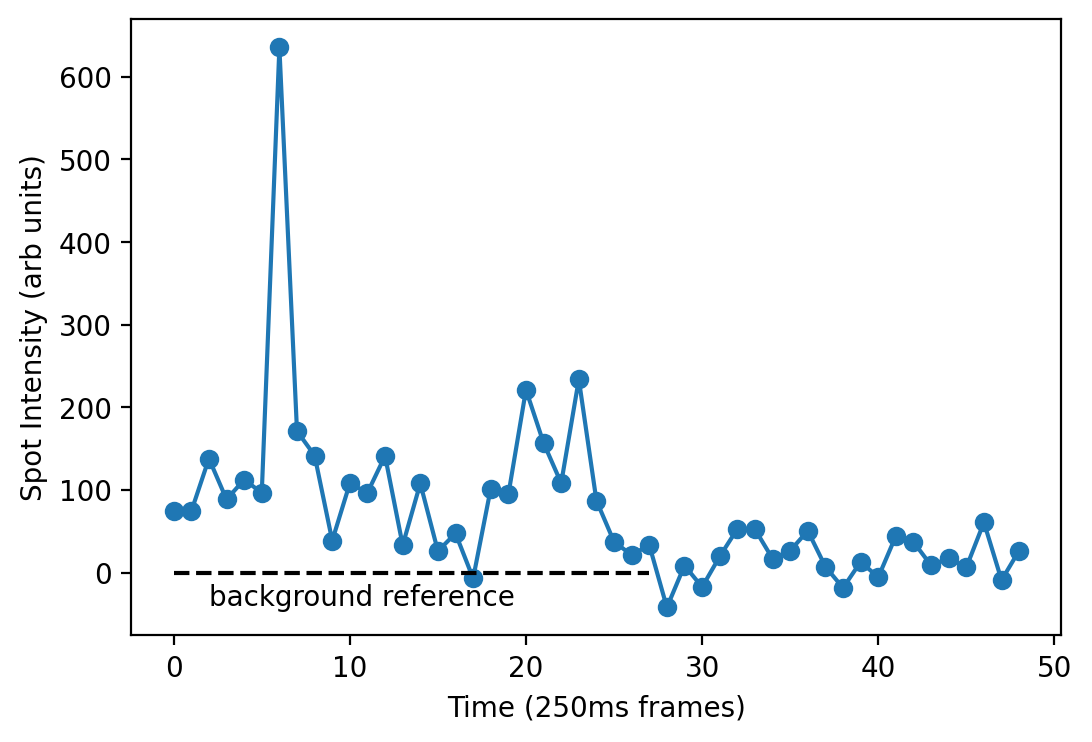

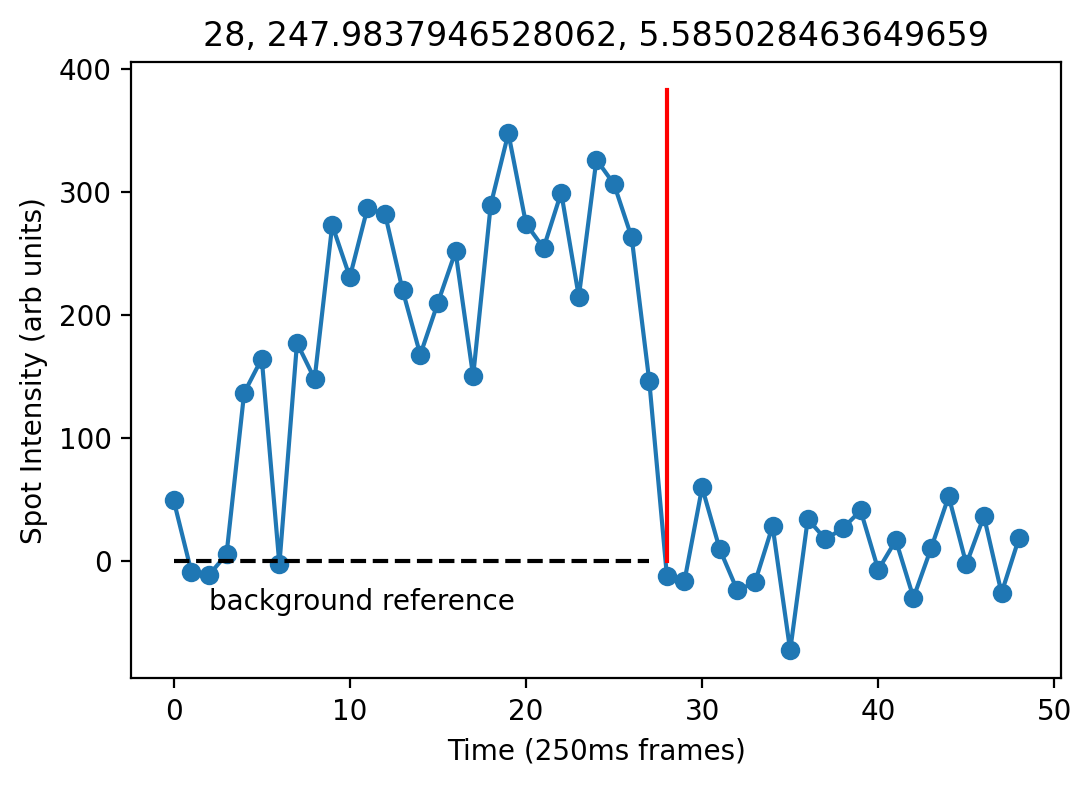

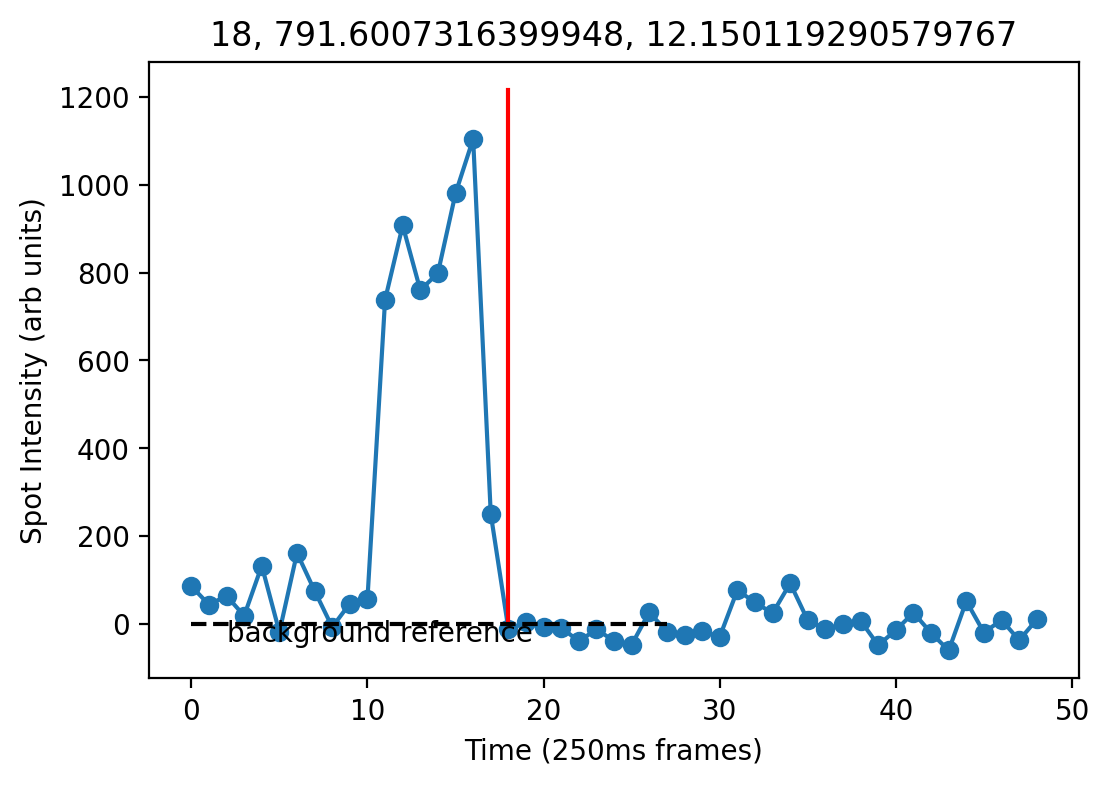

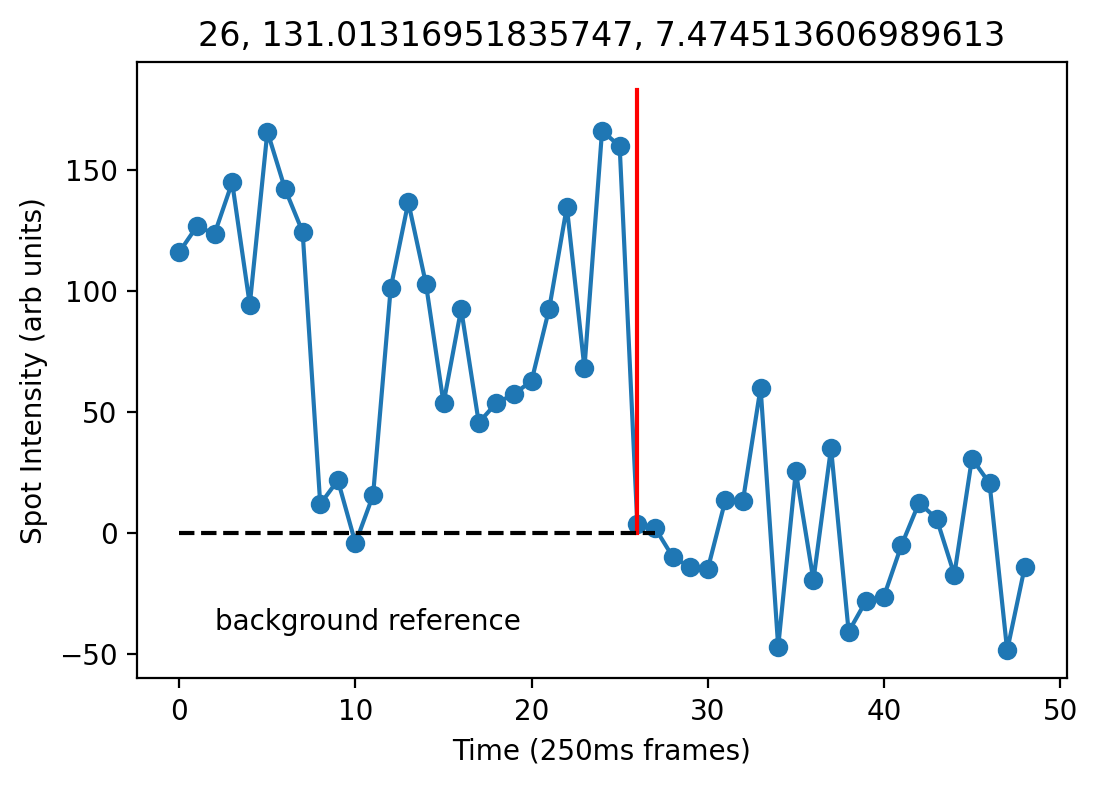

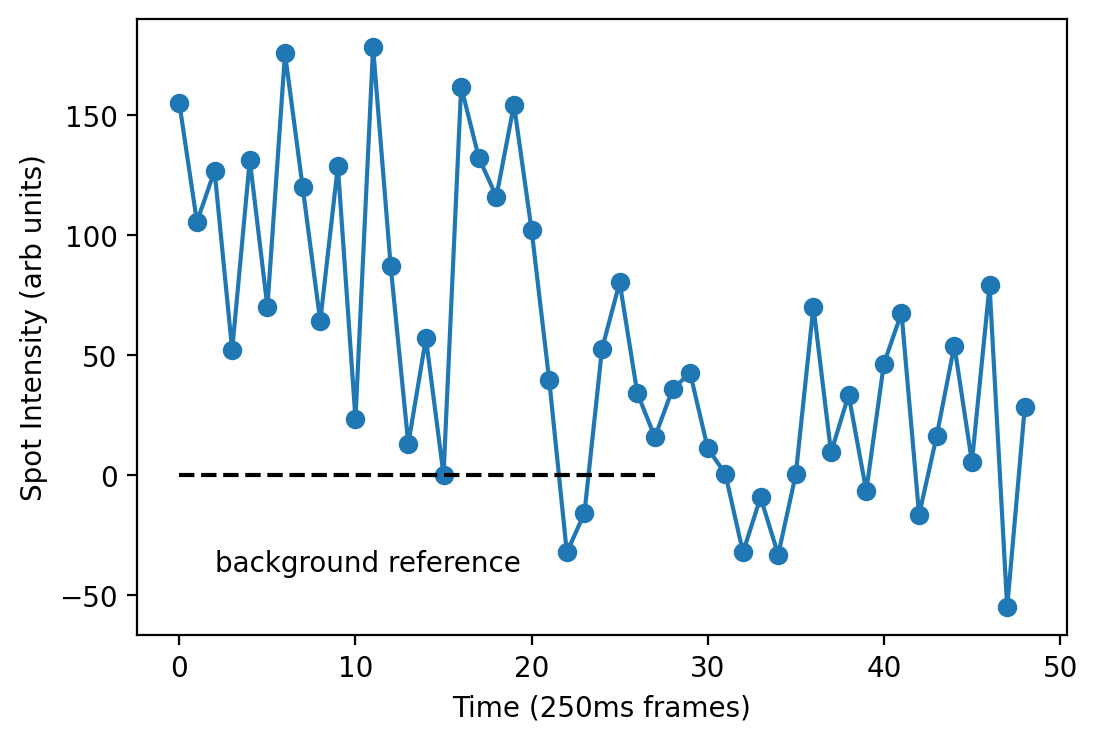

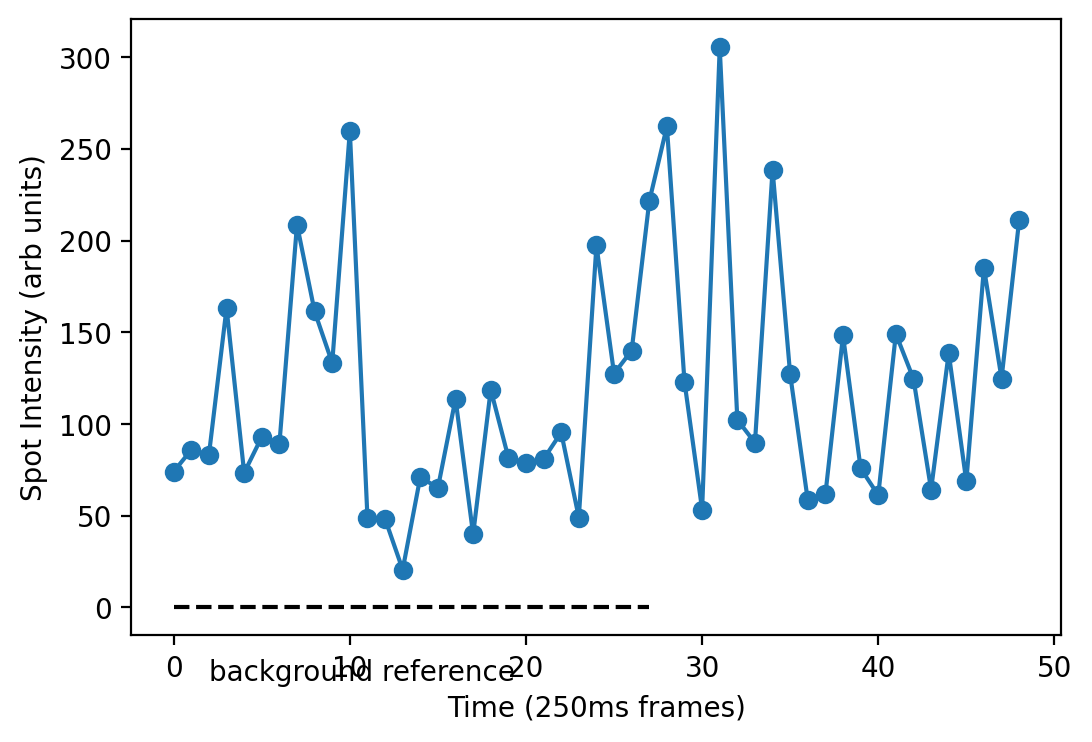

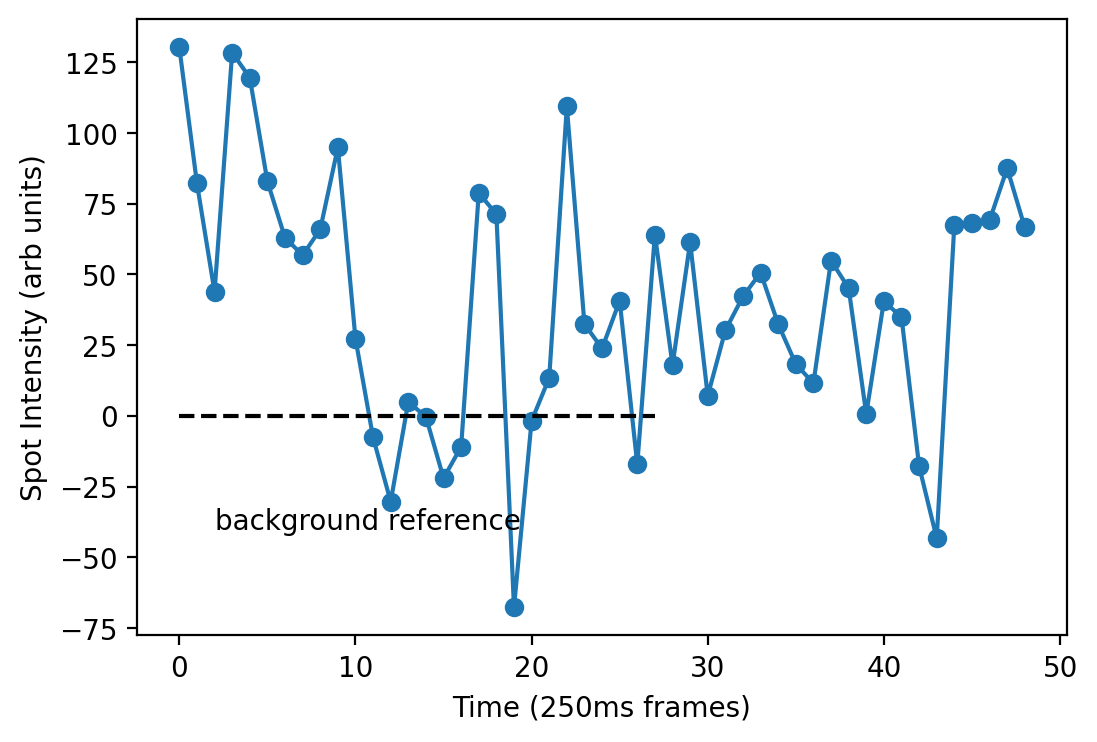

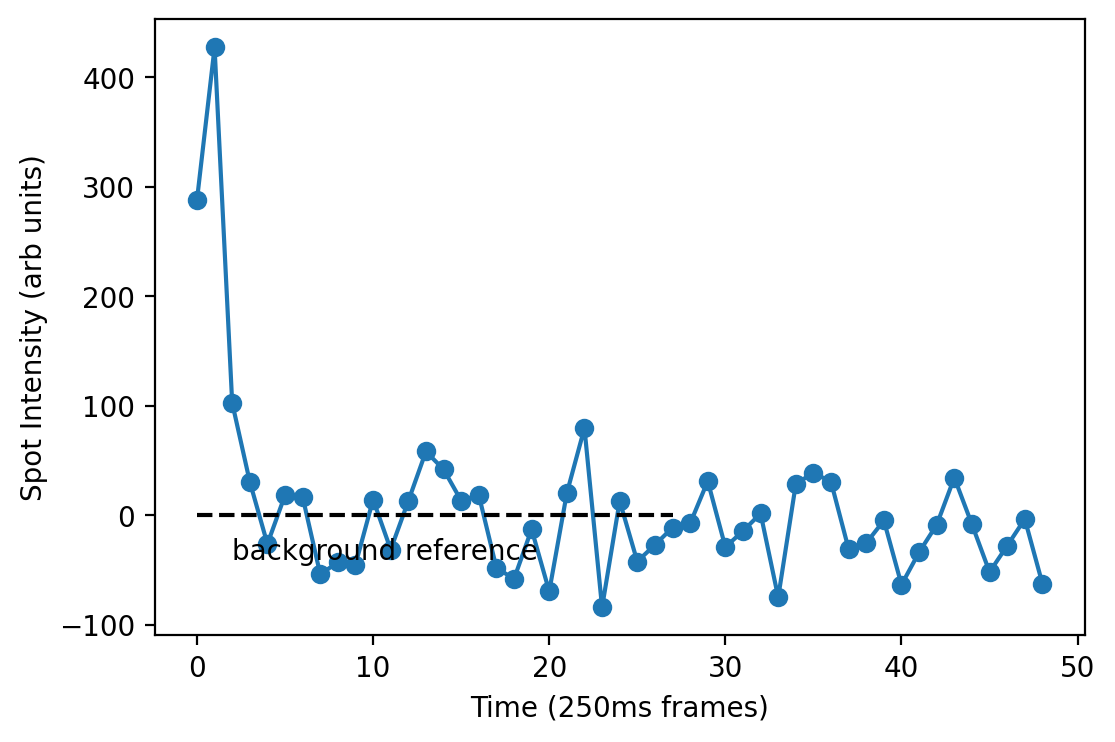

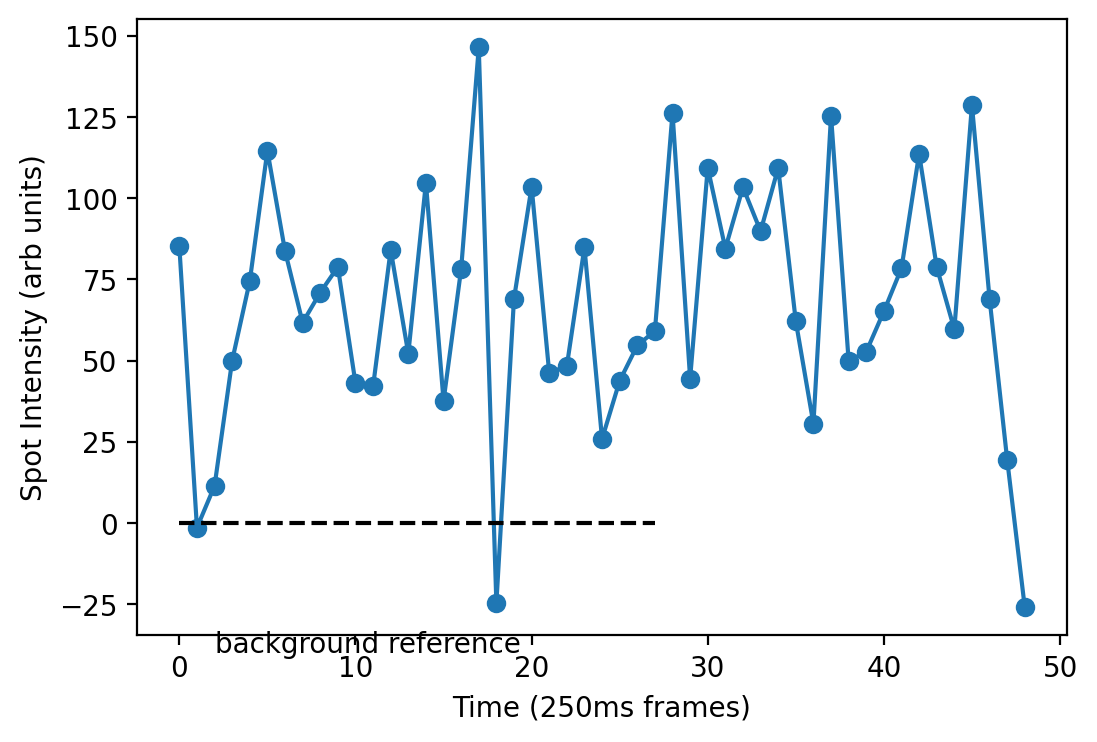

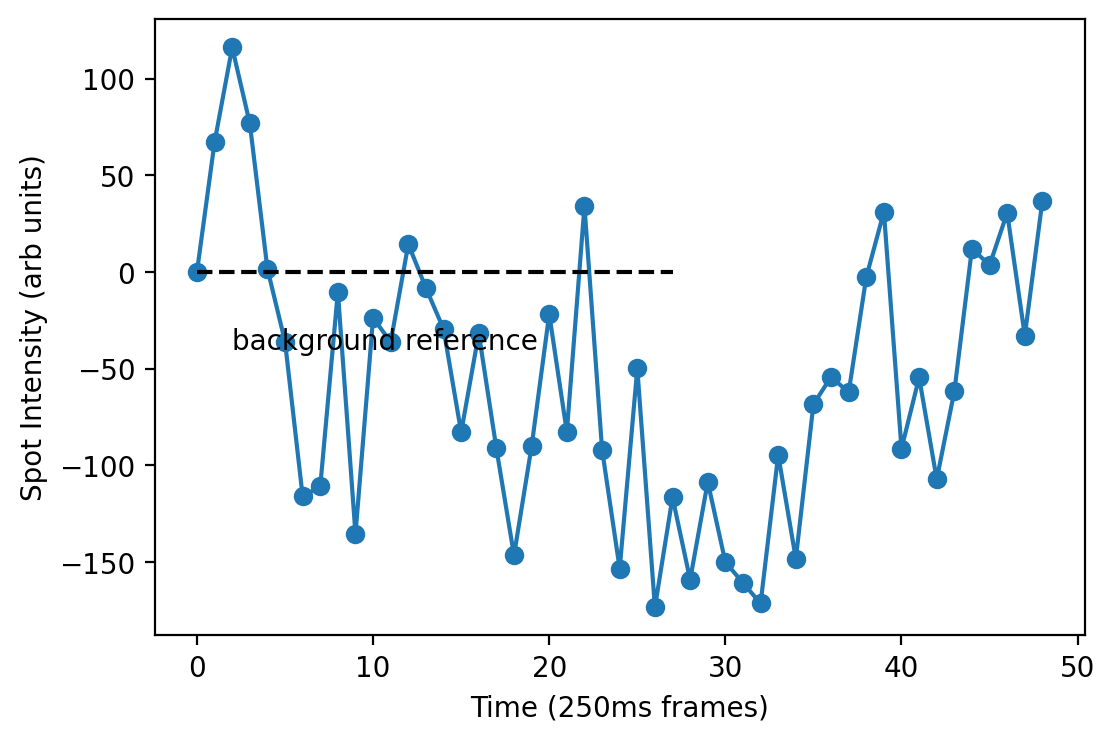

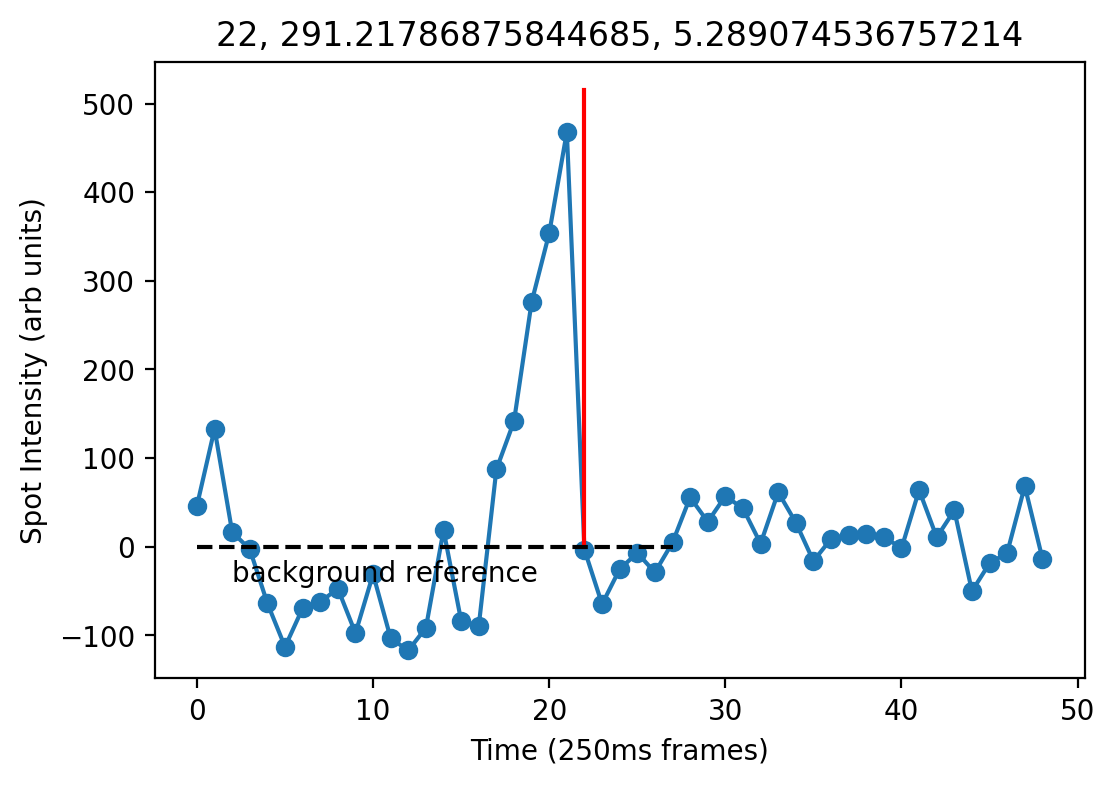

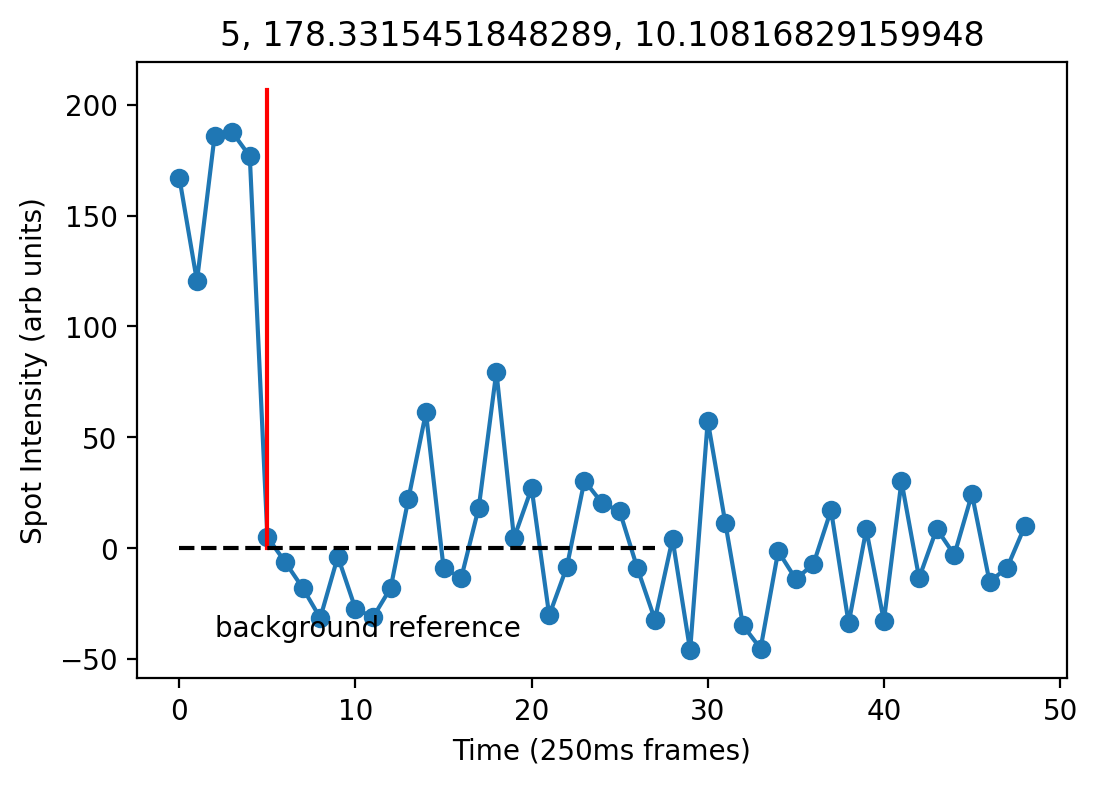

409


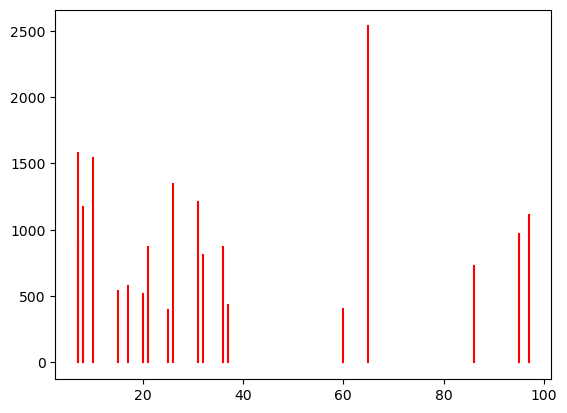

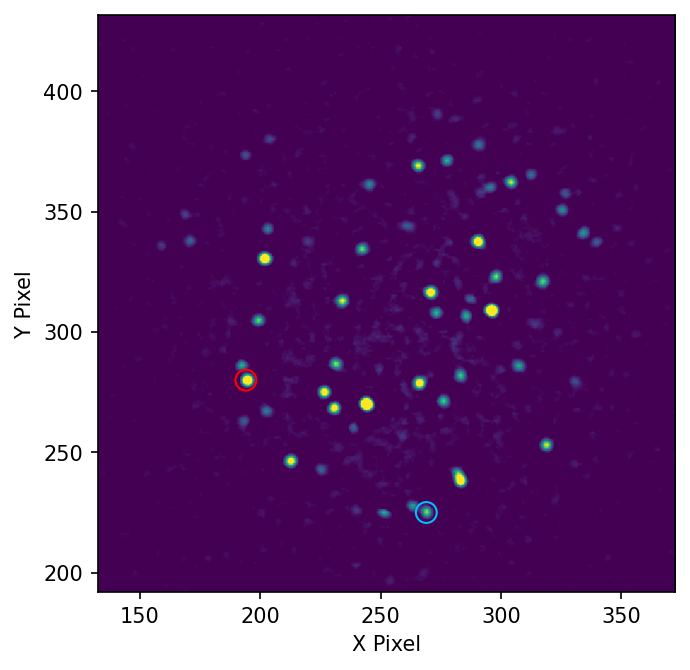

In [88]:
ConfCut=0
SpotsDict={'Heights':[],
          'Times':[],
          'Confs':[],
          'Traces':[],
          'X':[],
          'Y':[],
          'Im':[],
          'Folder':[],
          'IntegralBefore':[],
          'IntegralAfter':[],
          'Integral':[]}
for i in [11]:
    
    print(dat.iloc[i].Start)
    filenames=[]
    for j in range(dat.iloc[i].Start,dat.iloc[i].End):
        filenames.append(Root+"/"+str(dat.iloc[i].Folder)+"/Image"+str(dat.iloc[i].ImIndex)+"_"+str(j).zfill(5)+".tif")
    settings=SequenceSettings()
    settings.imtype='tif'
    Seq=Sequence(filenames,settings)    
    for spot in range(0,20):
        TimeSeq=Seq.GetTimeSeq(spot)
        Locs,StepHeight,StepConfidence=Seq.StepMetric(TimeSeq)

        if(sum(np.array(StepConfidence)>ConfCut)>0):
            s=np.argmax(StepConfidence)
            plt.plot([Locs[s],Locs[s]],[0,np.max(TimeSeq)*1.1],color='red')
            SpotsDict['Times'].append(Locs[s])
            SpotsDict['Heights'].append(StepHeight[s])
            SpotsDict['Confs'].append(StepConfidence[s])
            SpotsDict['Traces'].append(TimeSeq)
            SpotsDict['X'].append(Seq.Found[spot,0])
            SpotsDict['Y'].append(Seq.Found[spot,1])
            SpotsDict['Im'].append(i)
            SpotsDict['Folder'].append(dat.iloc[i].Folder)
            SpotsDict['IntegralBefore'].append(sum(TimeSeq[0:s]))
            SpotsDict['IntegralAfter'].append(sum(TimeSeq[s:]))  
            SpotsDict['Integral'].append(sum(TimeSeq))
    # Make a pic with SMFI candidates circled
    XCen=Seq.Images[10].XCenter
    YCen=Seq.Images[10].YCenter
    plt.figure(figsize=(5,5),dpi=150)
    plt.imshow(Seq.GetSummedImage(range(0,10))/10-Seq.GetSummedImage(range(-10,-1))/10)
    plt.clim(400,8000)
    plt.scatter(Seq.Found[2,0],Seq.Found[2,1],facecolors='none', edgecolors='r',s=100)
    plt.scatter(Seq.Found[17,0],Seq.Found[17,1],facecolors='none', edgecolors='deepskyblue',s=100)

#    for j in range(0,20):
#        plt.text(Seq.Found[j,0]+5,Seq.Found[j,1]-5,str(j),color='red')
        
    
    plt.xlim(XCen-120,XCen+120)
    plt.ylim(YCen-120,YCen+120)
#    plt.title(i)
    plt.xlabel("X Pixel")
    plt.ylabel("Y Pixel")
    plt.show()
f=open(Root+"/spots.dat",'wb')
pickle.dump(SpotsDict,f)
f.close()


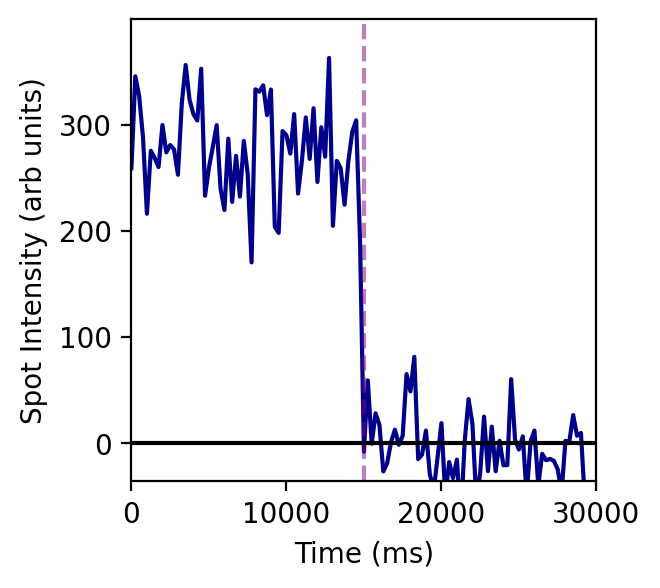

In [93]:



#for spot in range(0,20):
for spot in [17]:
    TimeSeq=Seq.GetTimeSeq(spot)


    
    Locs,StepHeight,StepConfidence=Seq.StepMetric(TimeSeq)

    plt.figure(figsize=(3,3),dpi=200)
    plt.plot(np.arange(0,len(TimeSeq))*250,TimeSeq,'-',color='DarkBlue')
#    plt.plot(Locs,StepHeight,label='step height metric')

    if(sum(np.array(StepConfidence)>5)>0):
        s=np.argmax(StepConfidence)
        plt.plot([Locs[s]*250,Locs[s]*250],[np.max(TimeSeq)*-0.1,np.max(TimeSeq)*1.1],'--',color='purple',alpha=0.5)
    plt.xlabel("Time (ms)")
    plt.ylim(-0.1*np.max(TimeSeq),np.max(TimeSeq)*1.1)
    plt.ylabel("Spot Intensity (arb units)")
    plt.plot([0,30000],[0,0],'-',color='black')
#    plt.text(100,-0.05*np.max(TimeSeq),'background reference',color='dimgrey')
    plt.xlim(0,30000)

/var/folders/vy/ll7qjbxx66v846pybl4qyvh80000gs/T/ipykernel_22920/2207897140.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


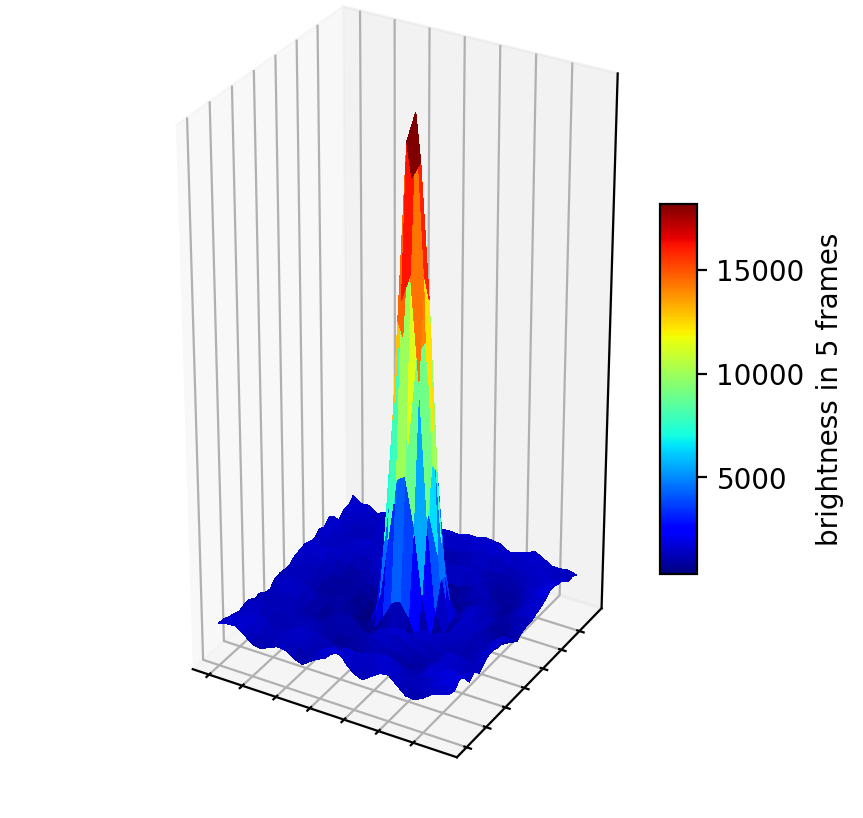

In [94]:
pt=2
sz=14

dataX=np.arange(Seq.Found[pt,0]-sz,Seq.Found[pt,0]+sz)
dataY=np.arange(Seq.Found[pt,1]-sz,Seq.Found[pt,1]+sz)
X,Y=np.meshgrid(dataX, dataY)
Z=(Seq.GetSummedImage(range(10,20),Filtered=True)/10)[Seq.Found[pt,1]-sz:Seq.Found[pt,1]+sz,Seq.Found[pt,0]-sz:Seq.Found[pt,0]+sz]


import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=200)
ax.set_box_aspect(aspect=(1.5, 1.5, 3))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_zticks([])
ax.set_xticks(range(Seq.Found[pt,0]-sz,Seq.Found[pt,0]+sz,4),[])
ax.set_yticks(range(Seq.Found[pt,1]-sz,Seq.Found[pt,1]+sz,4),[])
#ax.set_yticks([])
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10,label='brightness in 5 frames',pad=-0.1)
#plt.xlabel("X Pixel")
#plt.ylabel("Y Pixel")
plt.tight_layout()
plt.show()

In [ ]:
fig.colorbar?